In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import pandas as pd
from sklearn.linear_model import ElasticNet

In [15]:
n = 200
true_intercept = 1
true_slope = 2

df = pd.DataFrame({'x':np.linspace(0,1,n)})
df['true_regression_line'] = true_intercept + true_slope * df['x']
df['y'] = df['true_regression_line'] + np.random.normal(scale=.5, size=n)

# x = np.linspace(0, 1, size)
# # y = a + b*x
# true_regression_line = true_intercept + true_slope * x
# # add noise
# y = true_regression_line + np.random.normal(scale=.5, size=size)

# data = dict(x=x, y=y)

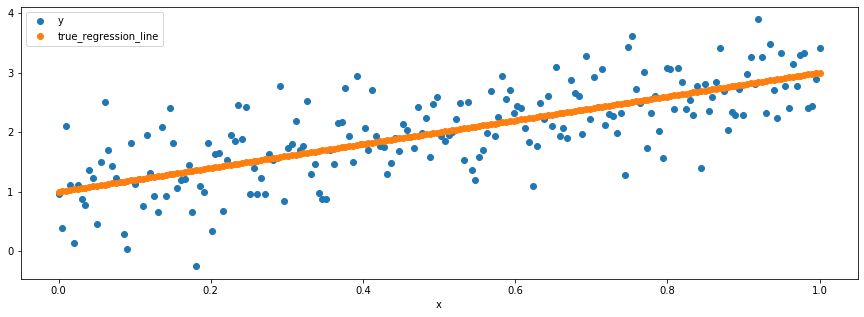

In [16]:
df.plot('x', ['y', 'true_regression_line'], style='o', figsize=(15,5))

In [125]:
with Model() as model:
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=1/5)
    x_coeff = Normal('x', 0, sigma=1/5)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * df['x'],
                        sigma=sigma, observed=df['y'])

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:15<00:00, 444.85draws/s]
The acceptance probability does not match the target. It is 0.8872006525494054, but should be close to 0.8. Try to increase the number of tuning steps.


<ipython-input-126-8ced04551fdb>:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();


<Figure size 504x504 with 0 Axes>

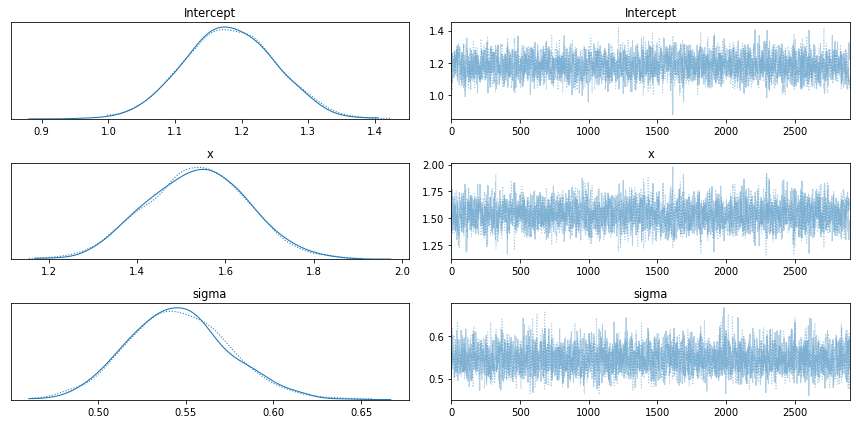

In [126]:
# Analyzing the model
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

In [127]:
print(f"estimated intercept: {trace['Intercept'].mean()},\nestimate coeficient: {trace['x'].mean()}")

estimated intercept: 1.1824831386478651,
estimate coeficient: 1.5353747077161


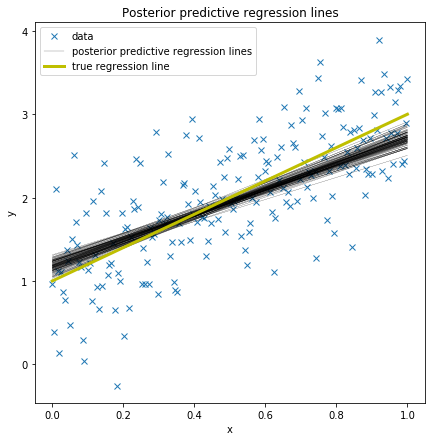

In [128]:
plt.figure(figsize=(7, 7))
plt.plot(df['x'], df['y'], 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(df['x'], df['true_regression_line'], label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

# Frequentist Regularization

In [129]:
# l1_ratio = 1 is the lasso penalty
# Note: Currently, l1_ratio <= 0.01 is not reliable

def fit_model(X, y, model_type='ridge'):
    if model_type == 'ridge':
        model = ElasticNet(alpha=0.02, l1_ratio=0.00000001, fit_intercept=True)
    elif model_type == 'lasso':
        model = ElasticNet(alpha=1.0, l1_ratio=1, fit_intercept=True)
    else:
        print(f"{model_type} is not one of the valid choices.\nPlease select either 'ridge' or 'lasso'")
        
    model.fit(X, y)
    print(f"{model_type} estimated intercept: {model.intercept_},\n{model_type} estimated coeficient: {model.coef_}")

In [130]:
fit_model(
    X=df['x'].to_numpy().reshape(-1, 1),
    y=df['y'].to_numpy().reshape(-1, 1), 
    model_type='ridge')

ridge estimated intercept: [1.20855979],
ridge estimated coeficient: [1.57367873]


In [131]:
fit_model(
    X=df['x'].to_numpy().reshape(-1, 1),
    y=df['y'].to_numpy().reshape(-1, 1), 
    model_type='lasso')

lasso estimated intercept: [1.99539915],
lasso estimated coeficient: [0.]
